<a href="https://colab.research.google.com/github/MaverickDev-J/DEMO/blob/main/chicken_fecal_93.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions to avoid warnings


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!pip install kaggle


In [ ]:
!kaggle datasets list


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
!kaggle datasets download -d allandclive/chicken-disease-1


Dataset URL: https://www.kaggle.com/datasets/allandclive/chicken-disease-1
License(s): unknown
 99% 262M/266M [00:07<00:00, 33.3MB/s]
100% 266M/266M [00:07<00:00, 37.8MB/s]


In [ ]:
!unzip chicken-disease-1.zip -d ./chicken-disease


Streaming output truncated to the last 5000 lines.
  inflating: ./chicken-disease/Train/healthy.1867.jpg  
  inflating: ./chicken-disease/Train/healthy.1868.jpg  
  inflating: ./chicken-disease/Train/healthy.1869.jpg  
  inflating: ./chicken-disease/Train/healthy.187.jpg  
  inflating: ./chicken-disease/Train/healthy.1870.jpg  
  inflating: ./chicken-disease/Train/healthy.1871.jpg  
  inflating: ./chicken-disease/Train/healthy.1872.jpg  
  inflating: ./chicken-disease/Train/healthy.1873.jpg  
  inflating: ./chicken-disease/Train/healthy.1874.jpg  
  inflating: ./chicken-disease/Train/healthy.1875.jpg  
  inflating: ./chicken-disease/Train/healthy.1876.jpg  
  inflating: ./chicken-disease/Train/healthy.1877.jpg  
  inflating: ./chicken-disease/Train/healthy.1878.jpg  
  inflating: ./chicken-disease/Train/healthy.1879.jpg  
  inflating: ./chicken-disease/Train/healthy.188.jpg  
  inflating: ./chicken-disease/Train/healthy.1880.jpg  
  inflating: ./chicken-disease/Train/healthy.1881.jpg  

In [23]:
import pandas as pd

df = pd.read_csv("./chicken-disease/train_data.csv")  # Replace with actual file name


In [26]:
df.head()

,images,label
0,salmo.1558.jpg,Salmonella
1,cocci.1866.jpg,Coccidiosis
2,cocci.171.jpg,Coccidiosis
3,salmo.1484.jpg,Salmonella
4,ncd.100.jpg,New Castle Disease


In [28]:
df['label'].value_counts()

,count
label,
Salmonella,2625
Coccidiosis,2476
Healthy,2404
New Castle Disease,562


In [29]:
import os
import shutil

# Define source and destination directories
source_folder = "./chicken-disease/Train"  # Update this to the actual image folder path
destination_folder = "./organized-dataset"  # Update this to where you want the organized images

# Define the mapping of original 8 categories to the final 4 categories
category_mapping = {
    "healthy": "healthy",
    "pcrhealthy": "healthy",
    "salmo": "salmo",
    "pcrsalmo": "salmo",
    "cocci": "cocci",
    "pcrcocci": "cocci",
    "ncd": "ncd",
    "pcrncd": "ncd"
}

# Create folders for the 4 final categories if they don't exist
final_categories = set(category_mapping.values())
for category in final_categories:
    category_path = os.path.join(destination_folder, category)
    os.makedirs(category_path, exist_ok=True)

# Iterate over images in the source folder and move them to the correct class
for filename in os.listdir(source_folder):
    for original_category, new_category in category_mapping.items():
        if filename.startswith(original_category):  # Check if the filename starts with a category name
            src_path = os.path.join(source_folder, filename)
            dest_path = os.path.join(destination_folder, new_category, filename)
            shutil.move(src_path, dest_path)  # Move the image to the respective folder
            print(f"Moved: {filename} → {new_category}/")
            break  # Move to the next file after finding a match

print("Image sorting completed!")

# Count images in each final category
print("\nFinal category distribution:")
for class_name in final_categories:
    class_path = os.path.join(destination_folder, class_name)
    num_images = len(os.listdir(class_path))  # Count images
    print(f"Class '{class_name}' has {num_images} images.")


Image sorting completed!

Final category distribution:
Class 'salmo' has 2625 images.
Class 'healthy' has 2404 images.
Class 'cocci' has 2476 images.
Class 'ncd' has 562 images.


In [30]:
import os

destination_folder = "./organized-dataset"  # Folder where images were sorted

# Check the class folders
for class_name in os.listdir(destination_folder):
    class_path = os.path.join(destination_folder, class_name)
    if os.path.isdir(class_path):  # Ensure it's a folder
        num_images = len(os.listdir(class_path))  # Count images
        print(f"Class '{class_name}' has {num_images} images.")


Class 'healthy' has 2404 images.
Class 'ncd' has 562 images.
Class 'salmo' has 2625 images.
Class 'cocci' has 2476 images.


In [32]:
df.shape

(8067, 2)

In [21]:
train_df.head()

,images,label,image_path
0,healthy.2035.jpg,NaN,./organized-dataset/healthy/healthy.2035.jpg
1,healthy.480.jpg,NaN,./organized-dataset/healthy/healthy.480.jpg
2,healthy.1175.jpg,NaN,./organized-dataset/healthy/healthy.1175.jpg
3,pcrhealthy.346.jpg,NaN,./organized-dataset/healthy/pcrhealthy.346.jpg
4,healthy.1354.jpg,NaN,./organized-dataset/healthy/healthy.1354.jpg


In [33]:
import pandas as pd
import os
import random

# Define the dataset base path and CSV path
dataset_path = "./organized-dataset"
csv_path = "./chicken-disease/train_data.csv"
df = pd.read_csv(csv_path)

# Map the class merging logic
class_mapping = {
    "pcrhealthy": "healthy",
    "healthy": "healthy",
    "pcrsalmo": "salmo",
    "salmo": "salmo",
    "pcrcocci": "cocci",
    "cocci": "cocci",
    "pcrncd": "ncd",
    "ncd": "ncd",
}

# Function to generate new image paths and correct folder names
def get_image_path(row):
    old_class = row["images"].split(".")[0]
    new_class = class_mapping.get(old_class, old_class)
    return os.path.join(dataset_path, new_class, row["images"])

# Apply mapping and update paths
df["image_path"] = df.apply(get_image_path, axis=1)
df["class"] = df["images"].apply(lambda x: class_mapping[x.split(".")[0]])

# Keep only paths that exist
df = df[df["image_path"].apply(os.path.exists)]

# Shuffle dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split dataset: 70% Train, 20% Validation, 10% Test
train_split = int(0.7 * len(df))
val_split = int(0.9 * len(df))

train_df = df[:train_split]
val_df = df[train_split:val_split]
test_df = df[val_split:]

# Print dataset sizes
print(f"Total Images: {len(df)}")
print(f"Training Set: {len(train_df)} images")
print(f"Validation Set: {len(val_df)} images")
print(f"Test Set: {len(test_df)} images")

# Save CSV files
train_df.to_csv("train_data.csv", index=False)
val_df.to_csv("val_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)

print("Dataset successfully organized with merged classes.")


Total Images: 8067
Training Set: 5646 images
Validation Set: 1614 images
Test Set: 807 images
Dataset successfully organized with merged classes.


In [36]:
train_df['label'].value_counts()

,count
label,
Salmonella,1856
Coccidiosis,1725
Healthy,1669
New Castle Disease,396


In [39]:
train_df.head()

,images,label,image_path,class
0,cocci.1315.jpg,Coccidiosis,./organized-dataset/cocci/cocci.1315.jpg,cocci
1,cocci.837.jpg,Coccidiosis,./organized-dataset/cocci/cocci.837.jpg,cocci
2,healthy.1742.jpg,Healthy,./organized-dataset/healthy/healthy.1742.jpg,healthy
3,healthy.1965.jpg,Healthy,./organized-dataset/healthy/healthy.1965.jpg,healthy
4,pcrsalmo.116.jpg,Salmonella,./organized-dataset/salmo/pcrsalmo.116.jpg,salmo


In [37]:
val_df['label'].value_counts()

,count
label,
Salmonella,504
Coccidiosis,500
Healthy,494
New Castle Disease,116


In [38]:
test_df['label'].value_counts()

,count
label,
Salmonella,265
Coccidiosis,251
Healthy,241
New Castle Disease,50


In [ ]:
df['label'].value_counts()

,count
label,
Salmonella,2625
Coccidiosis,2476
Healthy,2404
New Castle Disease,562


In [ ]:
train_df['label'].value_counts()

,count
label,
Salmonella,1856
Coccidiosis,1725
Healthy,1669
New Castle Disease,396


In [ ]:
val_df['label'].value_counts()

,count
label,
Salmonella,504
Coccidiosis,500
Healthy,494
New Castle Disease,116


In [ ]:
test_df['label'].value_counts()

,count
label,
Salmonella,265
Coccidiosis,251
Healthy,241
New Castle Disease,50


In [40]:
from PIL import Image
import pandas as pd
import os

# Load the dataset CSV file (use train, val, and test separately)
df = pd.read_csv("train_data.csv")  # Change to "val_data.csv" or "test_data.csv" as needed

# List to store incorrect images
wrong_size_images = []
corrupted_images = []

# Check each image
for img_path in df["image_path"]:
    try:
        with Image.open(img_path) as img:
            if img.size != (224, 224):  # Check if size is incorrect
                wrong_size_images.append((img_path, img.size))
    except Exception as e:
        corrupted_images.append(img_path)  # Catch corrupted images

# Print results
if wrong_size_images:
    print(f"Found {len(wrong_size_images)} images with wrong sizes:")
    for img in wrong_size_images[:10]:  # Show only first 10
        print(img)

if corrupted_images:
    print(f"Found {len(corrupted_images)} corrupted images:")
    for img in corrupted_images[:10]:  # Show only first 10
        print(img)

if not wrong_size_images and not corrupted_images:
    print("✅ All images are correctly sized and not corrupted!")


✅ All images are correctly sized and not corrupted!


In [ ]:
df.head()

,images,label,image_path
0,cocci.1315.jpg,Coccidiosis,./organized-dataset/cocci/cocci.1315.jpg
1,cocci.837.jpg,Coccidiosis,./organized-dataset/cocci/cocci.837.jpg
2,healthy.1742.jpg,Healthy,./organized-dataset/healthy/healthy.1742.jpg
3,healthy.1965.jpg,Healthy,./organized-dataset/healthy/healthy.1965.jpg
4,pcrsalmo.116.jpg,Salmonella,./organized-dataset/pcrsalmo/pcrsalmo.116.jpg


In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom


# Image size & batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32  # Adjust based on available memory

# Define data augmentation layers
data_augmentation = keras.Sequential([
    RandomFlip("horizontal"),  # Flip images horizontally
    RandomRotation(0.2),       # Rotate images slightly (20%)
    RandomZoom(0.2),           # Zoom in on images
])

# Function to load and preprocess images
def load_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)  # Decode JPEG
    image = tf.image.resize(image, IMG_SIZE) / 255.0  # Resize & normalize
    return image, label

# Function to create a TensorFlow dataset
def create_dataset(df, augment=False):
    image_paths = df["image_path"].values
    labels = df["label"].astype('category').cat.codes.values  # Convert labels to numeric values

    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    dataset = dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)

    if augment:
        dataset = dataset.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=tf.data.AUTOTUNE)

    return dataset.shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Create datasets
train_ds = create_dataset(train_df, augment=True)  # Apply augmentation only for training
val_ds = create_dataset(val_df)
test_ds = create_dataset(test_df)

# Print dataset info
print(train_ds)
print(val_ds)
print(test_ds)


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int8, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int8, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int8, name=None))>


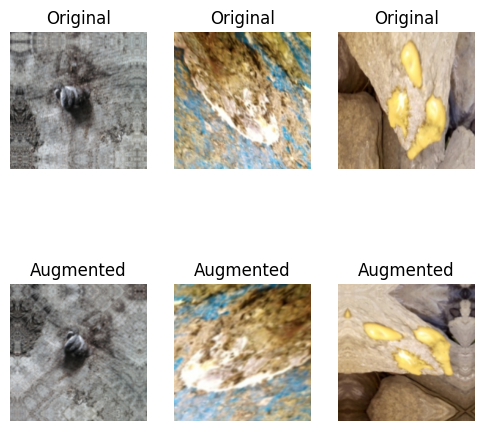

In [43]:
import matplotlib.pyplot as plt

# Get a batch of images from the training dataset
sample_batch = train_ds.take(1)  # Take 1 batch (32 images)
sample_images, _ = next(iter(sample_batch))  # Extract images (ignore labels)

# Apply augmentation manually for visualization
augmented_images = [data_augmentation(img) for img in sample_images[:3]]  # Apply augmentation to 3 images

# Plot original vs augmented images
plt.figure(figsize=(6, 6))

for i in range(3):  # Show only 3 images
    plt.subplot(2, 3, i + 1)  # Original images
    plt.imshow(sample_images[i].numpy())
    plt.axis("off")
    plt.title("Original")

    plt.subplot(2, 3, i + 4)  # Augmented images
    plt.imshow(augmented_images[i].numpy())
    plt.axis("off")
    plt.title("Augmented")

plt.show()


In [44]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers

# Load VGG16 without the top classification layers
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze the base model to keep its learned features
base_model.trainable = False

# Print model summary
base_model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [45]:
model = keras.Sequential([
    base_model,  # Pretrained VGG16 base
    layers.GlobalAveragePooling2D(),  # Better than Flatten() for reducing parameters
    layers.Dense(512, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(4, activation="softmax")  # 8 classes (output layer)
])

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Small learning rate
    loss="sparse_categorical_crossentropy",  # Suitable for integer labels
    metrics=["accuracy"]
)

# Print model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,145,156 (57.77 MB)

 Trainable params: 428,932 (1.64 MB)

 Non-trainable params: 14,716,224 (56.14 MB)

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Stop after 3 epochs without improvement
    restore_best_weights=True
)

# Train with early stopping
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,  # Increase the max epochs
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 118s 507ms/step - accuracy: 0.4836 - loss: 2.1535 - val_accuracy: 0.7385 - val_loss: 1.6819
Epoch 2/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 91s 466ms/step - accuracy: 0.7157 - loss: 1.4740 - val_accuracy: 0.7770 - val_loss: 1.2743
Epoch 3/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 93s 467ms/step - accuracy: 0.7409 - loss: 1.3412 - val_accuracy: 0.7900 - val_loss: 1.1212
Epoch 4/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 95s 477ms/step - accuracy: 0.7675 - loss: 1.2256 - val_accuracy: 0.8079 - val_loss: 1.0659
Epoch 5/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 92s 470ms/step - accuracy: 0.7589 - loss: 1.1705 - val_accuracy: 0.8086 - val_loss: 1.0088
Epoch 6/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 93s 474ms/step - accuracy: 0.7724 - loss: 1.1236 - val_accuracy: 0.8240 - val_loss: 0.9864
Epoch 7/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 92s 465ms/step - accuracy: 0.7746 - loss: 1.1123 - val_accuracy: 0.8321 - val_loss: 0.9434
Epoch 8/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 94s 466ms/step - accuracy: 0.7793 - loss: 

In [48]:
# Unfreeze the last 5 layers of VGG16
for layer in base_model.layers[-5:]:
    layer.trainable = True

# Compile again with a lower learning rate
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.00001),  # Even lower learning rate
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Train again with fine-tuning
history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,  # Train for a few more epochs
    callbacks=[early_stopping]
)


Epoch 1/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 117s 529ms/step - accuracy: 0.8378 - loss: 0.7759 - val_accuracy: 0.8600 - val_loss: 0.7233
Epoch 2/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 101s 502ms/step - accuracy: 0.8583 - loss: 0.7289 - val_accuracy: 0.8996 - val_loss: 0.6237
Epoch 3/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 99s 499ms/step - accuracy: 0.8786 - loss: 0.6556 - val_accuracy: 0.8916 - val_loss: 0.6181
Epoch 4/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 141s 494ms/step - accuracy: 0.8881 - loss: 0.6445 - val_accuracy: 0.9002 - val_loss: 0.6168
Epoch 5/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 98s 500ms/step - accuracy: 0.9017 - loss: 0.6172 - val_accuracy: 0.8922 - val_loss: 0.6444
Epoch 6/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 99s 503ms/step - accuracy: 0.9099 - loss: 0.5907 - val_accuracy: 0.9176 - val_loss: 0.5601
Epoch 7/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 99s 499ms/step - accuracy: 0.9062 - loss: 0.5910 - val_accuracy: 0.9176 - val_loss: 0.5603
Epoch 8/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 142s 501ms/step - accuracy: 0.9089 - los

In [49]:
# Evaluate on test dataset
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.4f}")


26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 351ms/step - accuracy: 0.9447 - loss: 0.5052
Test Accuracy: 0.9306


In [53]:
import tensorflow as tf
import numpy as np
from PIL import Image

# Image size as used during training
IMG_SIZE = (224, 224)

# Class names corresponding to the label encoding
class_names = ["Cocci", "Healthy", "NCD", "Salmo"]  # Example class names

def load_and_preprocess_image(image_path):
    # Load image using PIL
    img = Image.open(image_path)

    # Resize and normalize
    img = img.resize(IMG_SIZE)
    img_array = np.array(img) / 255.0  # Normalize pixel values

    # Expand dimensions to match the input shape of the model
    img_array = np.expand_dims(img_array, axis=0)

    return img_array

def classify_image(image_path):
    # Load and preprocess the image
    img_array = load_and_preprocess_image(image_path)

    # Get predictions
    predictions = model.predict(img_array)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions)

    # Map index to class name
    predicted_class = class_names[predicted_class_index]

    # Print prediction and confidence
    confidence = predictions[0][predicted_class_index]
    print(f"Predicted class: {predicted_class} (Confidence: {confidence:.2f})")

# Example usage
image_path = "/content/n2.jpg"
classify_image(image_path)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Predicted class: NCD (Confidence: 0.69)
